In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [62]:
# Data loading
df=pd.read_csv("./9401_13260_bundle_archive/Salary_Data.csv")

In [63]:
# Data Summary
print(df.head())
print(df.shape)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)


In [64]:
# Seperating independent and dependent features
X=df.iloc[:,[0]]
Y=df.iloc[:,[1]]

Text(0, 0.5, 'Salary')

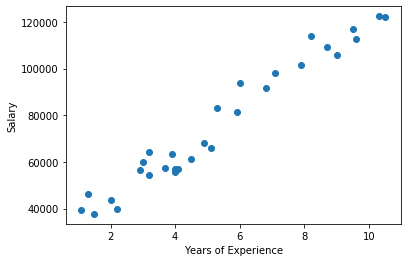

In [6]:
# Let's plot the data using scatter plot
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

From the plot results we could see that there is a high correlation between Housing Area and Housing Price (obviously) and therefore we could use a line (linear model) to fit this data.

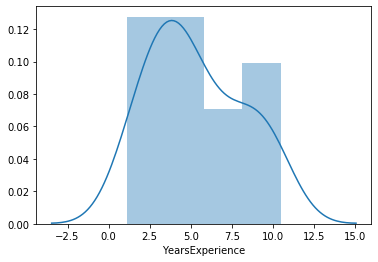

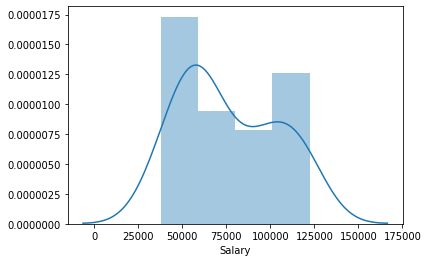

In [31]:
# We can even check for the distribution of the data
for column in df.columns :
    plt.figure()
    sns.distplot(df[column])

In [65]:
# Formula to calculate coefficient(x,y) = covariance(x,y)/var(x)
#
# Here, covariance(x,y) = sum((x_value - x_mean) * (y_value - y_mean))/total number of records(N)
# and variance(x) = sum(x_value - x_mean)^2/total number of records(N)
#
def _compute_coefficient(x,y):
    numerator=0
    denominator=0
    
    for i in range(len(x)):
        x_value = x[i]
        y_value = y[i]
        x_mean = x.mean()
        y_mean = y.mean()
        
        numerator += ((x_value - x_mean) * (y_value - y_mean))
        denominator += (x_value - x_mean)**2
        
        return numerator / denominator

In [62]:
# Formula to calculate intercept = y_mean - (coefficient(x,y) * x_mean)
#
def _compute_intercept(x,y):
    return y.mean() - (_compute_coefficient(x,y) * x.mean())

In [63]:
def fit(self, x, y):
    '''
        Given a dataset with 1 input feature x and output feature y,
        estimates the coefficient and compute the intercept.
    '''
    self.coefficient = self._compute_coefficient(x, y)
    self.intercept = self._compute_intercept(x, y)

In [64]:
 def predict(self, x):
        '''
            y = m * x + c / y = b0 + b1 * x
            where,  c / b0 --> (intercept)
                    m / b1 --> (coefficient)
        '''
        x_times_coeff = np.multiply(x, self.coefficient)
        return np.add(x_times_coeff, self.intercept)

In [128]:
def r2_score(self, y_true, y_pred):
    y_average = np.average(y_true)

    residual_sum_of_squares = 0
    total_sum_of_squares = 0

    for i in range(len(y_true)):
        residual_sum_of_squares += (y_true[i] - y_pred[i])**2
        total_sum_of_squares += (y_true[i] - y_average)**2

    return 1 - (residual_sum_of_squares/total_sum_of_squares)

In [66]:
# Let's combine all function and enclosed within a class named SimpleLinearRegression()
class SimpleLinearRegression():
    # initializing the intercept and conefficient variables at the time of object initialization
    def __init__(self):
        self.coefficient = None
        self.intercept = None
########################################################################################

    def _compute_coefficient(self, x,y):
        numerator=0
        denominator=0
        
        for i in range(len(x)):
            x_value = x[i]
            y_value = y[i]
            x_mean = x.mean()
            y_mean = y.mean()
        
            numerator += ((x_value - x_mean) * (y_value - y_mean))
            denominator += (x_value - x_mean)**2
        
            return numerator / denominator
##############################################################################################

    def _compute_intercept(self, x,y):
        return y.mean() - (self._compute_coefficient(x,y) * x.mean())
##############################################################################################

    def fit(self, x, y):
        '''
            Given a dataset with 1 input feature x and output feature y,
            estimates the coefficient and compute the intercept.
        '''
        self.coefficient = self._compute_coefficient(x, y)
        self.intercept = self._compute_intercept(x, y)
###############################################################################################    

    def predict(self, x):
        '''
            y = m * x + c / y = b0 + b1 * x
            where,  c / b0 --> (intercept)
                    m / b1 --> (coefficient)
        '''
        x_times_coeff = np.multiply(x, self.coefficient)
        return np.add(x_times_coeff, self.intercept)
#############################################################################################

    def r2_score(self, y_true, y_pred):
        y_average = np.average(y_true)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_true)):
            residual_sum_of_squares += (y_true[i] - y_pred[i])**2
            total_sum_of_squares += (y_true[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

In [67]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=.3,random_state=42)

In [68]:
df2 = pd.concat([X_train,y_train],axis=1)

In [69]:
slr = SimpleLinearRegression()
slr.fit(X_train.values,y_train.values)

In [70]:
print(f'Intercept : {slr._compute_intercept(X_train.values,y_train.values)}')
print(f'Coefficient : {slr._compute_coefficient(X_train.values,y_train.values)}')

Intercept : [29998.59821429]
Coefficient : [8494.91071429]


In [196]:
pred = slr.predict(X_test)

In [208]:
pred.values

array([[111549.74107143],
       [ 71623.66071429],
       [ 99656.86607143],
       [ 75021.625     ],
       [ 57182.3125    ],
       [ 61429.76785714],
       [117496.17857143],
       [103904.32142857],
       [ 63978.24107143]])

In [209]:
score = slr.r2_score(y_test.values, pred.values)
print(f'The R^2 score is {score}')

The R^2 score is [0.92170289]


### Let's check the accuracy with sklearn library of LinearRegression

In [198]:
from sklearn.linear_model import LinearRegression

In [205]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
pred_reg = reg.predict(X_test.values)

In [219]:
pred_reg

array([[115573.62288352],
       [ 71679.93878159],
       [102498.90847018],
       [ 75415.57147111],
       [ 55803.4998511 ],
       [ 60473.04071301],
       [122110.98009019],
       [107168.44933209],
       [ 63274.76523015]])

In [223]:
slr.r2_score(y_test.values, pred_reg)

array([0.94144662])

In [213]:
print(f'Intercept {reg.intercept_}')
print(f'Coefficient {reg.coef_}')

Intercept [25918.43833489]
Coefficient [[9339.08172382]]


In [59]:
lm1 = smf.ols(formula='Salary ~ YearsExperience', data=df2).fit()

In [60]:
lm1.params

Intercept          25918.438335
YearsExperience     9339.081724
dtype: float64

In [61]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.74e-14
Time:                        13:51:32   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.592e+04   2507.522     10.336      0.000    2.07e+04    3.12e+04
YearsExperience  9339.0817    451.653     20.678      0.000    8393.761    1.03e+04
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.625
Skew:                           0.281   Prob(JB):                        0.732
Kurtosis:                       2.368   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from sklearn.cluster import KMeans

In [75]:
cluser = KMeans(n_clusters=2)
kmeans = cluser.fit(X)

In [77]:
len(kmeans.labels_)

30

In [78]:
X.shape

(30, 1)